In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from utils.helper import load_and_summarize, scale_dataframe

In [2]:
# Create a synthetic dataset for visualization
X_syn, y_syn = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

In [3]:
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Linear Kernel SVM

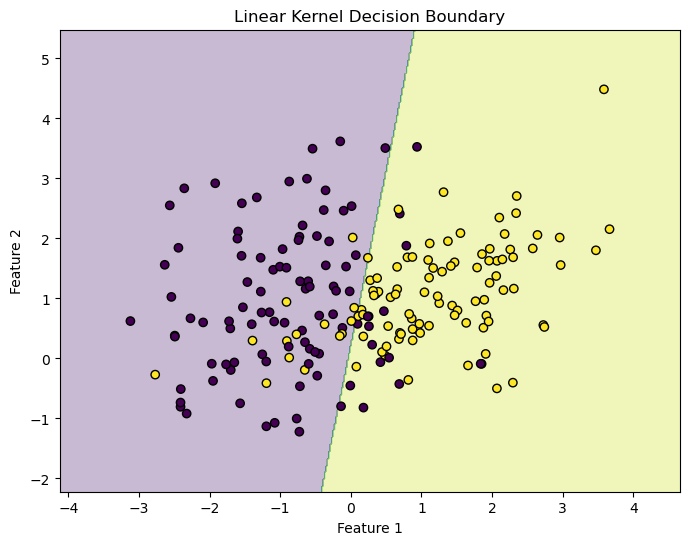

In [4]:
# Creates a straight-line decision boundary.
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_syn, y_syn)
plot_decision_boundary(linear_svm, X_syn, y_syn, "Linear Kernel Decision Boundary")

# Polynomial Kernel SVM 

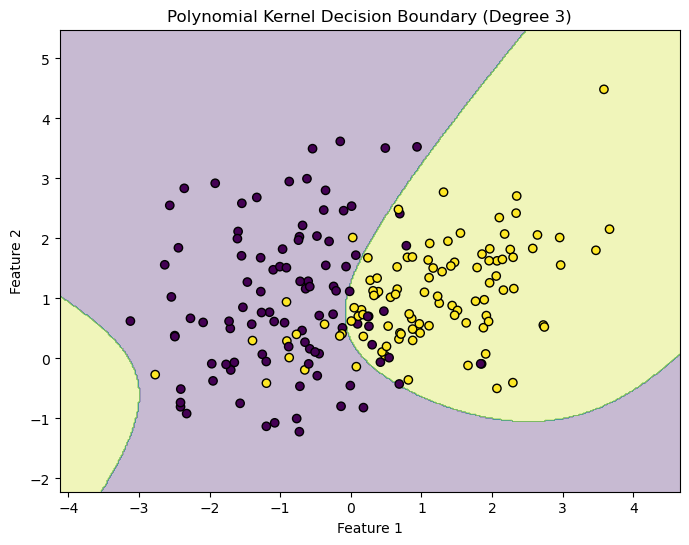

In [5]:
# Creates a curved, non-linear decision boundary.
poly_svm = SVC(kernel='poly', degree=3, coef0=1, random_state=42)
poly_svm.fit(X_syn, y_syn)
plot_decision_boundary(poly_svm, X_syn, y_syn, "Polynomial Kernel Decision Boundary (Degree 3)")

# RBF Kernel SVM

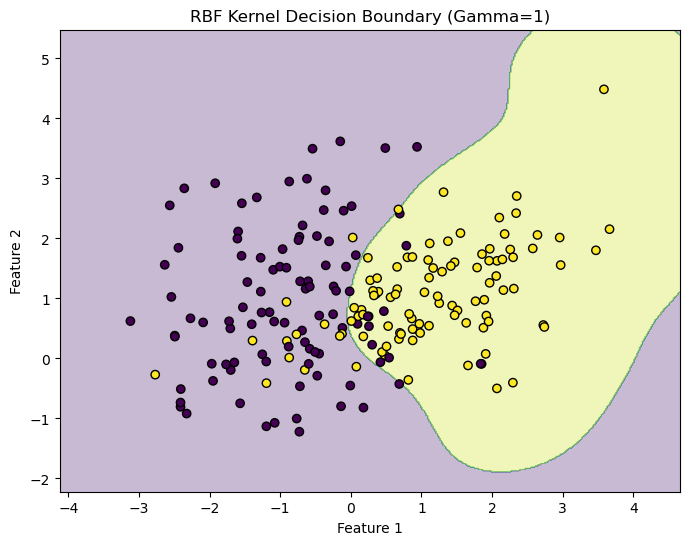

In [6]:
# Creates a more complex, localized boundary. Gamma controls the influence of each training example.
rbf_svm = SVC(kernel='rbf', gamma=1, random_state=42)
rbf_svm.fit(X_syn, y_syn)
plot_decision_boundary(rbf_svm, X_syn, y_syn, "RBF Kernel Decision Boundary (Gamma=1)")

# Hyperparameter Tuning for RBF Kernel (Gamma)

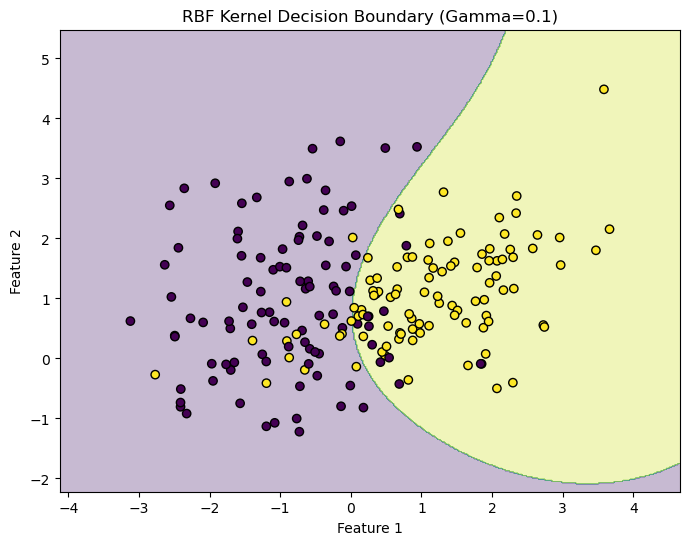

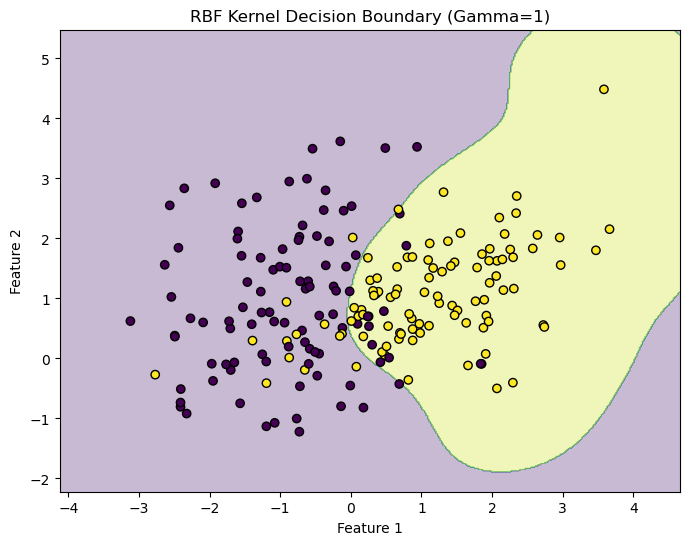

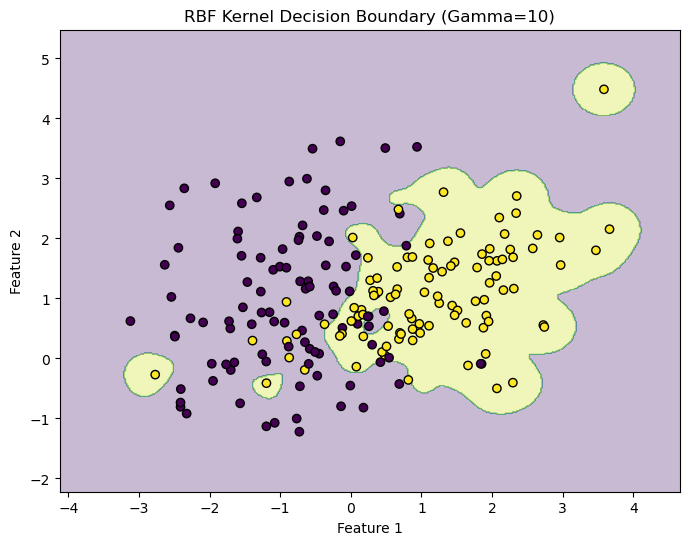

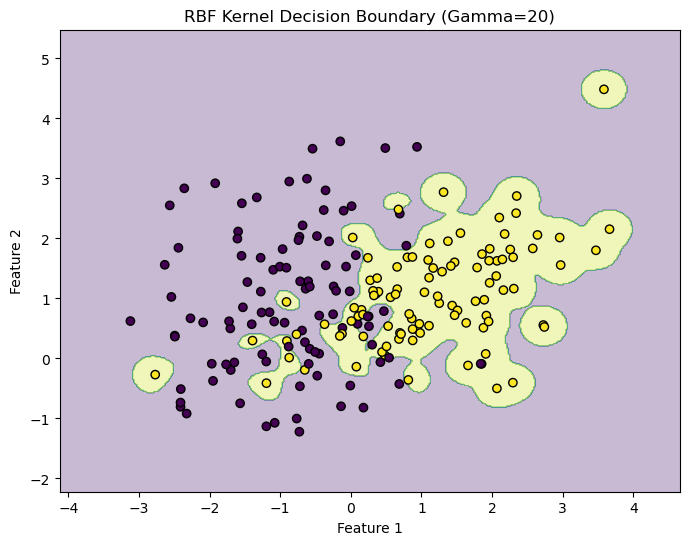

In [8]:
# This shows how changing gamma affects the model's flexibility.
# Small gamma leads to a smoother, broader boundary (potential underfitting).
# Large gamma leads to a more complex, tighter boundary (potential overfitting).

gamma_values = [0.1, 1, 10, 20]

for gamma in gamma_values:
    rbf_svm_tuned = SVC(kernel='rbf', gamma=gamma, random_state=42)
    rbf_svm_tuned.fit(X_syn, y_syn)
    plot_decision_boundary(
        rbf_svm_tuned, 
        X_syn, 
        y_syn, 
        f"RBF Kernel Decision Boundary (Gamma={gamma})"
    )